# Getting Dominant Colours in an Image 


## Colour Extraction Using K-means
#### source - https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71

[array([40.81297831, 93.26039675, 77.4623231 ]),
 array([222.71707317, 248.99955654, 243.6172949 ]),
 array([126.45628415, 158.63114754, 150.06869633]),
 array([161.30189959, 192.88263229, 184.68453189]),
 array([245.21292436, 252.70518166, 252.54615843]),
 array([30.66730843, 63.14574509, 53.84020023]),
 array([ 66.30772425, 104.4964701 ,  93.7736711 ]),
 array([50.64658183, 91.79328005, 79.93873671]),
 array([192.98122066, 221.89586001, 214.88903116]),
 array([ 95.88701518, 129.68929174, 120.47428331])]

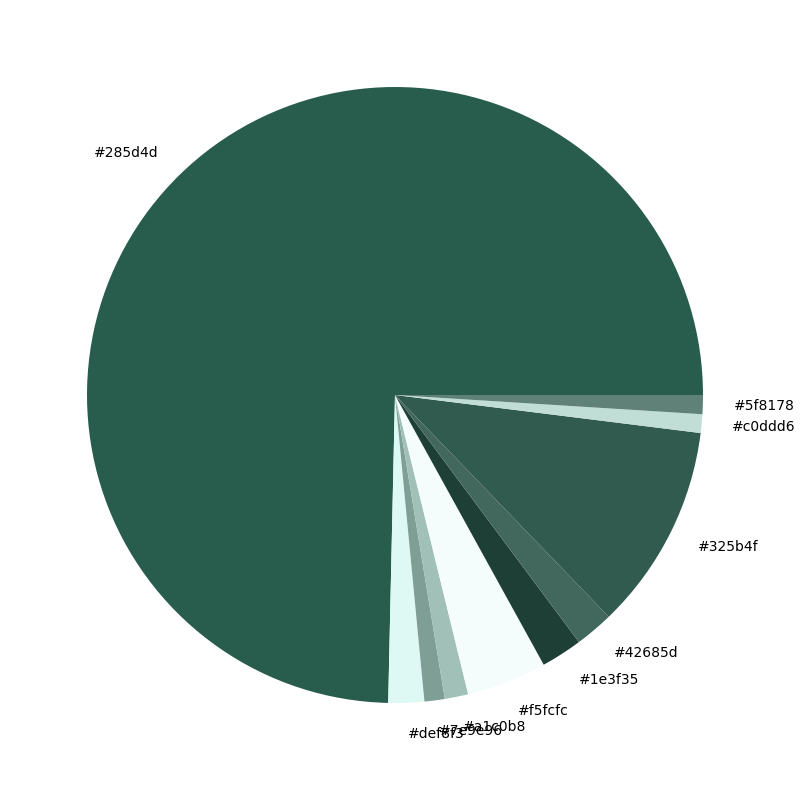

In [13]:
#Code from https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (10, 10))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors


get_colors(get_image('C:/Users/Mylu/Downloads/test/fsclogo_gn.jpeg'), 10, True)

#Looking for 40,92,77 or #285C4D

## Getting Dominant Colours using ColorThief
#### source - https://github.com/fengsp/color-thief-py

(19, 18, 18) Dominant Color (Quality 1)
[(212, 210, 209), (18, 17, 17), (103, 101, 100), (132, 132, 132), (140, 132, 136), (59, 58, 57), (76, 76, 73), (132, 124, 132), (76, 68, 76)]


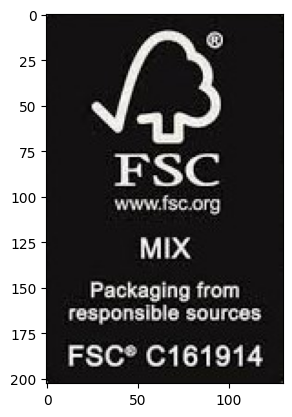

In [16]:
from colorthief import ColorThief
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

imagepath='C:/Users/Mylu/Downloads/test/fsclogo_bn.jpeg'
img = np.asarray(Image.open(imagepath))

color_thief = ColorThief(imagepath)

#get the dominant color
dominant_color = color_thief.get_color(quality=1)

#build a color palette
palette = color_thief.get_palette(color_count=10)

print(dominant_color,"Dominant Color (Quality 1)")
print(palette)

plt.imshow(img)


#626C PANTONE GREEN RGB VALUE IS : 40,92,77

## Extracting all the Colours using PIL
#### source - https://shegocodes.medium.com/extracting-all-colors-in-images-with-python-2e36eb8a67d2

In [17]:
import matplotlib.pyplot as plt
from PIL import Image

#Code is from https://shegocodes.medium.com/extracting-all-colors-in-images-with-python-2e36eb8a67d2




def resize_image(width, height, threshold):
    """
    Function takes in an image's original dimensions and returns the 
    new width and height while maintaining its aspect ratio where 
    both are below the threshold. Purpose is to reduce runtime and 
    not distort the original image too much. 
    
    Parameters
    ----------
    width : int
        original width of image
    height : int 
        original height of image
    threshold : int
        max dimension size for both width and height
    """
    if (width > threshold) or (height > threshold):
        max_dim = max(width, height)
        if height == max_dim:
            new_width = int((width * threshold) / height)
            new_height = threshold
        if width == max_dim:
            new_height = int((height * threshold) / width)
            new_width = threshold
        return new_height, new_width
    else: return height, width

def detect_colors(image_path):
    """
    Function returns colors detected in image. 
    
    Parameters
    ----------
    image_path : str
        path to imagefile for detection
        
    Return
    ------
    sorted list of tuples (color, total number detections) 
    """
    
    # Read image
    image = Image.open(image_path)
    
    # Convert image into RGB
    image = image.convert('RGB')    # Get width and height of image
    width, height = image.size
    print(f'Original dimensions: {width} x {height}')
    
    # Resize image to improve runtime
    width, height = resize_image(width, height, threshold=100)
    print(f'New dimensions: {width} x {height}')
    image = image.resize((width, height))
 
    # Iterate through each pixel
    detected_colors = {} # hash-map
    for x in range(0, width):
        for y in range(0, height):
            # r,g,b value of pixel
            r, g, b = image.getpixel((x, y))
            rgb = f'{r}:{g}:{b}'
            if rgb in detected_colors:
                detected_colors[rgb] += 1
            else: 
                detected_colors[rgb] = 1
 
    # Sort colors from most common to least common
    detected_colors = sorted(detected_colors.items(), key=lambda x:x[1], reverse=True)
    return detected_colors


image_pathgn='C:/Users/Mylu/Downloads/test/fsclogo_gn.jpeg'
image_pathgp='C:/Users/Mylu/Downloads/test/fsclogo_gp.jpeg'
image_pathbp='C:/Users/Mylu/Downloads/test/fsclogoBP.png'
image_pathbn='C:/Users/Mylu/Downloads/test/fsclogo_bn.jpeg'


detect_colors(image_pathgn)


Original dimensions: 175 x 245
New dimensions: 100 x 71


[('41:94:78', 2326),
 ('40:94:78', 439),
 ('42:93:78', 390),
 ('39:94:78', 151),
 ('44:92:78', 89),
 ('42:94:78', 81),
 ('41:93:78', 77),
 ('44:82:71', 64),
 ('38:94:78', 62),
 ('38:95:78', 59),
 ('41:96:77', 58),
 ('39:95:75', 58),
 ('44:94:79', 57),
 ('41:93:76', 56),
 ('43:91:75', 55),
 ('49:91:79', 54),
 ('39:95:78', 54),
 ('43:78:68', 51),
 ('255:255:255', 50),
 ('40:93:77', 47),
 ('43:93:78', 46),
 ('43:92:78', 37),
 ('42:79:66', 35),
 ('40:95:78', 34),
 ('42:95:79', 32),
 ('41:95:79', 32),
 ('42:94:79', 29),
 ('41:92:77', 27),
 ('43:94:79', 25),
 ('41:79:66', 24),
 ('43:79:66', 24),
 ('41:93:77', 22),
 ('37:95:78', 21),
 ('40:95:79', 18),
 ('42:92:77', 17),
 ('44:93:78', 17),
 ('38:94:77', 17),
 ('37:96:78', 15),
 ('43:94:78', 15),
 ('40:91:76', 15),
 ('38:89:74', 15),
 ('39:90:75', 14),
 ('254:255:255', 14),
 ('44:93:79', 14),
 ('45:91:78', 12),
 ('40:92:77', 12),
 ('45:92:78', 12),
 ('39:93:77', 12),
 ('42:91:77', 12),
 ('250:255:255', 12),
 ('38:96:78', 11),
 ('41:95:78', 11)

## Masking Image within a certain colour range and getting the percentage 
#### source - https://stackoverflow.com/questions/54019108/how-to-count-the-pixels-of-a-certain-color-with-opencv


In [18]:
#Code is from:
#https://stackoverflow.com/questions/54019108/how-to-count-the-pixels-of-a-certain-color-with-opencv

import numpy as np
import cv2



def colourPercentage(colour,diff):
    
    boundaries = [([colour[2]-diff, colour[1]-diff, colour[0]-diff],
               [colour[2]+diff, colour[1]+diff, colour[0]+diff])]


    for (lower, upper) in boundaries:
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = cv2.inRange(img, lower, upper)
        output = cv2.bitwise_and(img, img, mask=mask)
    
        ratio_colour = cv2.countNonZero(mask)/(img.size/3)
        print('Colour pixel percentage:', np.round(ratio_colour*100, 2))
    
        concatimg = np.concatenate((img,output), axis=1)
        cv2.imshow("images",concatimg)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


img = cv2.imread('C:/Users/Mylu/Downloads/test/fsclogo_bn.jpeg')
black = [20,20,20]
green = [40,92,77]
white = [250,250,250]

#When setting the diff ensure the RGU values do not go below 0 or above 255
colourPercentage(black,20)

Colour pixel percentage: 84.47


# Getting Text Colour


## Using Pytesseract to create a bounding box over text
#### Source - https://medium.com/@dprakash05/a-complete-guide-to-build-optical-character-recognition-ocr-in-python-5bf179d47db8

In [21]:
from PIL import Image
import pytesseract
import numpy as np
from pytesseract import Output
import cv2

#Code from https://medium.com/@dprakash05/a-complete-guide-to-build-optical-character-recognition-ocr-in-python-5bf179d47db8
pytesseract.pytesseract.tesseract_cmd =r'C:\Program Files\Tesseract-OCR\tesseract.exe'

image = np.array(Image.open('C:/Users/Mylu/Downloads/test/fsclogo_bn.jpeg'))
text = pytesseract.image_to_string(image)

results = pytesseract.image_to_data(image, output_type=Output.DICT)

for i in range(0, len(results["text"])):
    x = results["left"][i]
    y = results["top"][i]
    
    w = results["width"][i]
    h = results["height"][i]    
    text = results["text"][i]
    conf = int(results["conf"][i])    
    if conf > 58:
        text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)

cv2.imshow(" ",image)
cv2.waitKey(0) 
  
#closing all open windows 
cv2.destroyAllWindows()

## Applying PIL .getdata over bounding box region

In [22]:
import cv2
import pytesseract
from PIL import Image

# Specify the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

# Load the image using OpenCV
img_path = 'C:/Users/Mylu/Downloads/test/fsclogo_gn.jpeg'
img = cv2.imread(img_path)

# Convert the image to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

boxes = pytesseract.image_to_boxes(img_rgb)

img_pil = Image.fromarray(img_rgb)

for b in boxes.splitlines():
    b = b.split(' ')
    # Extract coordinates and text
    x, y, x1, y1, text = int(b[1]), int(b[2]), int(b[3]), int(b[4]), b[0]
    
    # Crop the region using PIL
    cropped_region = img_pil.crop((x, img_rgb.shape[0] - y1, x1, img_rgb.shape[0] - y))

    # Get the RGB values using getdata()
    rgb_values = list(cropped_region.getdata())
    
    # Calculate the average RGB value
    avg_color = tuple(sum(c) // len(c) for c in zip(*rgb_values))
    
    print(f"Detected text: '{text}' - Average RGB: {avg_color}")

for b in boxes.splitlines():
    b = b.split(' ')
    x, y, x1, y1 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(img_rgb, (x, img_rgb.shape[0] - y1), (x1, img_rgb.shape[0] - y), (0, 255, 0), 2)  # Draw rectangle around text

# Display the image with rectangles
cv2.imshow('Image with Detected Text', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()


Detected text: 'F' - Average RGB: (121, 153, 145)
Detected text: 'S' - Average RGB: (136, 165, 158)
Detected text: 'C' - Average RGB: (108, 144, 134)
Detected text: 'M' - Average RGB: (141, 170, 163)
Detected text: 'I' - Average RGB: (228, 254, 250)
Detected text: 'X' - Average RGB: (108, 144, 135)
Detected text: '.' - Average RGB: (80, 126, 113)
Detected text: 'P' - Average RGB: (124, 162, 152)
Detected text: 'a' - Average RGB: (149, 183, 175)
Detected text: 'c' - Average RGB: (122, 158, 148)
Detected text: 'k' - Average RGB: (122, 156, 147)
Detected text: 'a' - Average RGB: (149, 184, 175)
Detected text: 'g' - Average RGB: (142, 175, 167)
Detected text: 'i' - Average RGB: (152, 190, 179)
Detected text: 'n' - Average RGB: (130, 166, 156)
Detected text: 'g' - Average RGB: (135, 170, 161)
Detected text: 'F' - Average RGB: (111, 149, 139)
Detected text: 'S' - Average RGB: (125, 158, 149)
Detected text: 'C' - Average RGB: (104, 144, 133)
Detected text: '*' - Average RGB: (120, 158, 148)
D

## Applying ColorThief over the bounding box region

Text: F
Dominant Color (RGB): (51, 94, 82)
Color Palette (RGB): [(51, 94, 82), (226, 242, 239), (172, 193, 188), (149, 188, 178), (128, 172, 156)]
Text: S
Dominant Color (RGB): (58, 97, 86)
Color Palette (RGB): [(58, 97, 86), (233, 248, 247), (163, 193, 185), (144, 172, 164), (188, 204, 196)]
Text: C
Dominant Color (RGB): (51, 96, 83)
Color Palette (RGB): [(51, 96, 83), (230, 247, 245), (156, 178, 172), (148, 188, 176), (134, 172, 161)]
Text: M
Dominant Color (RGB): (224, 249, 246)
Color Palette (RGB): [(224, 249, 246), (65, 98, 89), (172, 202, 194), (138, 166, 159), (152, 180, 172)]
Text: I
Dominant Color (RGB): (236, 252, 252)
Color Palette (RGB): [(236, 252, 252), (228, 252, 252), (220, 252, 244), (212, 252, 244), (228, 252, 244)]
Text: X
Dominant Color (RGB): (58, 97, 86)
Color Palette (RGB): [(58, 97, 86), (216, 244, 240), (148, 187, 176), (164, 180, 180), (148, 172, 164)]
Text: P
Dominant Color (RGB): (188, 223, 214)
Color Palette (RGB): [(188, 223, 214), (49, 87, 77), (64, 100, 

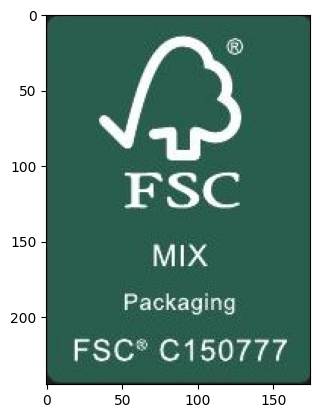

In [23]:
#Copy and pasting the colorthief code from:
#https://github.com/fengsp/color-thief-py/blob/master/colorthief.py#L53
# -*- coding: utf-8 -*-
"""
    colorthief
    ~~~~~~~~~~

    Grabbing the color palette from an image.

    :copyright: (c) 2015 by Shipeng Feng.
    :license: BSD, see LICENSE for more details.
"""
__version__ = '0.2.1'

import math

from PIL import Image


class cached_property(object):
    """Decorator that creates converts a method with a single
    self argument into a property cached on the instance.
    """
    def __init__(self, func):
        self.func = func

    def __get__(self, instance, type):
        res = instance.__dict__[self.func.__name__] = self.func(instance)
        return res


class ColorThief(object):
    """Color thief main class."""
    def __init__(self, file):
        """Create one color thief for one image.

        :param file: A filename (string) or a file object. The file object
                     must implement `read()`, `seek()`, and `tell()` methods,
                     and be opened in binary mode.
        """
        self.image = Image.open(file)

    def get_color(self, quality=10):
        """Get the dominant color.

        :param quality: quality settings, 1 is the highest quality, the bigger
                        the number, the faster a color will be returned but
                        the greater the likelihood that it will not be the
                        visually most dominant color
        :return tuple: (r, g, b)
        """
        palette = self.get_palette(5, quality)
        return palette[0]

    def get_palette(self, color_count=10, quality=10):
        """Build a color palette.  We are using the median cut algorithm to
        cluster similar colors.

        :param color_count: the size of the palette, max number of colors
        :param quality: quality settings, 1 is the highest quality, the bigger
                        the number, the faster the palette generation, but the
                        greater the likelihood that colors will be missed.
        :return list: a list of tuple in the form (r, g, b)
        """
        image = self.image.convert('RGBA')
        width, height = image.size
        pixels = image.getdata()
        pixel_count = width * height
        valid_pixels = []
        for i in range(0, pixel_count, quality):
            r, g, b, a = pixels[i]
            # Removed check if pixel is mostly oquape and not white
            valid_pixels.append((r, g, b))

        # Send array to quantize function which clusters values
        # using median cut algorithm
        cmap = MMCQ.quantize(valid_pixels, color_count)
        return cmap.palette


class MMCQ(object):
    """Basic Python port of the MMCQ (modified median cut quantization)
    algorithm from the Leptonica library (http://www.leptonica.com/).
    """

    SIGBITS = 5
    RSHIFT = 8 - SIGBITS
    MAX_ITERATION = 1000
    FRACT_BY_POPULATIONS = 0.75

    @staticmethod
    def get_color_index(r, g, b):
        return (r << (2 * MMCQ.SIGBITS)) + (g << MMCQ.SIGBITS) + b

    @staticmethod
    def get_histo(pixels):
        """histo (1-d array, giving the number of pixels in each quantized
        region of color space)
        """
        histo = dict()
        for pixel in pixels:
            rval = pixel[0] >> MMCQ.RSHIFT
            gval = pixel[1] >> MMCQ.RSHIFT
            bval = pixel[2] >> MMCQ.RSHIFT
            index = MMCQ.get_color_index(rval, gval, bval)
            histo[index] = histo.setdefault(index, 0) + 1
        return histo

    @staticmethod
    def vbox_from_pixels(pixels, histo):
        rmin = 1000000
        rmax = 0
        gmin = 1000000
        gmax = 0
        bmin = 1000000
        bmax = 0
        for pixel in pixels:
            rval = pixel[0] >> MMCQ.RSHIFT
            gval = pixel[1] >> MMCQ.RSHIFT
            bval = pixel[2] >> MMCQ.RSHIFT
            rmin = min(rval, rmin)
            rmax = max(rval, rmax)
            gmin = min(gval, gmin)
            gmax = max(gval, gmax)
            bmin = min(bval, bmin)
            bmax = max(bval, bmax)
        return VBox(rmin, rmax, gmin, gmax, bmin, bmax, histo)

    @staticmethod
    def median_cut_apply(histo, vbox):
        if not vbox.count:
            return (None, None)

        rw = vbox.r2 - vbox.r1 + 1
        gw = vbox.g2 - vbox.g1 + 1
        bw = vbox.b2 - vbox.b1 + 1
        maxw = max([rw, gw, bw])
        # only one pixel, no split
        if vbox.count == 1:
            return (vbox.copy, None)
        # Find the partial sum arrays along the selected axis.
        total = 0
        sum_ = 0
        partialsum = {}
        lookaheadsum = {}
        do_cut_color = None
        if maxw == rw:
            do_cut_color = 'r'
            for i in range(vbox.r1, vbox.r2+1):
                sum_ = 0
                for j in range(vbox.g1, vbox.g2+1):
                    for k in range(vbox.b1, vbox.b2+1):
                        index = MMCQ.get_color_index(i, j, k)
                        sum_ += histo.get(index, 0)
                total += sum_
                partialsum[i] = total
        elif maxw == gw:
            do_cut_color = 'g'
            for i in range(vbox.g1, vbox.g2+1):
                sum_ = 0
                for j in range(vbox.r1, vbox.r2+1):
                    for k in range(vbox.b1, vbox.b2+1):
                        index = MMCQ.get_color_index(j, i, k)
                        sum_ += histo.get(index, 0)
                total += sum_
                partialsum[i] = total
        else:  # maxw == bw
            do_cut_color = 'b'
            for i in range(vbox.b1, vbox.b2+1):
                sum_ = 0
                for j in range(vbox.r1, vbox.r2+1):
                    for k in range(vbox.g1, vbox.g2+1):
                        index = MMCQ.get_color_index(j, k, i)
                        sum_ += histo.get(index, 0)
                total += sum_
                partialsum[i] = total
        for i, d in partialsum.items():
            lookaheadsum[i] = total - d

        # determine the cut planes
        dim1 = do_cut_color + '1'
        dim2 = do_cut_color + '2'
        dim1_val = getattr(vbox, dim1)
        dim2_val = getattr(vbox, dim2)
        for i in range(dim1_val, dim2_val+1):
            if partialsum[i] > (total / 2):
                vbox1 = vbox.copy
                vbox2 = vbox.copy
                left = i - dim1_val
                right = dim2_val - i
                if left <= right:
                    d2 = min([dim2_val - 1, int(i + right / 2)])
                else:
                    d2 = max([dim1_val, int(i - 1 - left / 2)])
                # avoid 0-count boxes
                while not partialsum.get(d2, False):
                    d2 += 1
                count2 = lookaheadsum.get(d2)
                while not count2 and partialsum.get(d2-1, False):
                    d2 -= 1
                    count2 = lookaheadsum.get(d2)
                # set dimensions
                setattr(vbox1, dim2, d2)
                setattr(vbox2, dim1, getattr(vbox1, dim2) + 1)
                return (vbox1, vbox2)
        return (None, None)

    @staticmethod
    def quantize(pixels, max_color):
        """Quantize.

        :param pixels: a list of pixel in the form (r, g, b)
        :param max_color: max number of colors
        """
        if not pixels:
            raise Exception('Empty pixels when quantize.')
        if max_color < 2 or max_color > 256:
            raise Exception('Wrong number of max colors when quantize.')

        histo = MMCQ.get_histo(pixels)

        # check that we aren't below maxcolors already
        if len(histo) <= max_color:
            # generate the new colors from the histo and return
            pass

        # get the beginning vbox from the colors
        vbox = MMCQ.vbox_from_pixels(pixels, histo)
        pq = PQueue(lambda x: x.count)
        pq.push(vbox)

        # inner function to do the iteration
        def iter_(lh, target):
            n_color = 1
            n_iter = 0
            while n_iter < MMCQ.MAX_ITERATION:
                vbox = lh.pop()
                if not vbox.count:  # just put it back
                    lh.push(vbox)
                    n_iter += 1
                    continue
                # do the cut
                vbox1, vbox2 = MMCQ.median_cut_apply(histo, vbox)
                if not vbox1:
                    raise Exception("vbox1 not defined; shouldn't happen!")
                lh.push(vbox1)
                if vbox2:  # vbox2 can be null
                    lh.push(vbox2)
                    n_color += 1
                if n_color >= target:
                    return
                if n_iter > MMCQ.MAX_ITERATION:
                    return
                n_iter += 1

        # first set of colors, sorted by population
        iter_(pq, MMCQ.FRACT_BY_POPULATIONS * max_color)

        # Re-sort by the product of pixel occupancy times the size in
        # color space.
        pq2 = PQueue(lambda x: x.count * x.volume)
        while pq.size():
            pq2.push(pq.pop())

        # next set - generate the median cuts using the (npix * vol) sorting.
        iter_(pq2, max_color - pq2.size())

        # calculate the actual colors
        cmap = CMap()
        while pq2.size():
            cmap.push(pq2.pop())
        return cmap


class VBox(object):
    """3d color space box"""
    def __init__(self, r1, r2, g1, g2, b1, b2, histo):
        self.r1 = r1
        self.r2 = r2
        self.g1 = g1
        self.g2 = g2
        self.b1 = b1
        self.b2 = b2
        self.histo = histo

    @cached_property
    def volume(self):
        sub_r = self.r2 - self.r1
        sub_g = self.g2 - self.g1
        sub_b = self.b2 - self.b1
        return (sub_r + 1) * (sub_g + 1) * (sub_b + 1)

    @property
    def copy(self):
        return VBox(self.r1, self.r2, self.g1, self.g2,
                    self.b1, self.b2, self.histo)

    @cached_property
    def avg(self):
        ntot = 0
        mult = 1 << (8 - MMCQ.SIGBITS)
        r_sum = 0
        g_sum = 0
        b_sum = 0
        for i in range(self.r1, self.r2 + 1):
            for j in range(self.g1, self.g2 + 1):
                for k in range(self.b1, self.b2 + 1):
                    histoindex = MMCQ.get_color_index(i, j, k)
                    hval = self.histo.get(histoindex, 0)
                    ntot += hval
                    r_sum += hval * (i + 0.5) * mult
                    g_sum += hval * (j + 0.5) * mult
                    b_sum += hval * (k + 0.5) * mult

        if ntot:
            r_avg = int(r_sum / ntot)
            g_avg = int(g_sum / ntot)
            b_avg = int(b_sum / ntot)
        else:
            r_avg = int(mult * (self.r1 + self.r2 + 1) / 2)
            g_avg = int(mult * (self.g1 + self.g2 + 1) / 2)
            b_avg = int(mult * (self.b1 + self.b2 + 1) / 2)

        return r_avg, g_avg, b_avg

    def contains(self, pixel):
        rval = pixel[0] >> MMCQ.RSHIFT
        gval = pixel[1] >> MMCQ.RSHIFT
        bval = pixel[2] >> MMCQ.RSHIFT
        return all([
            rval >= self.r1,
            rval <= self.r2,
            gval >= self.g1,
            gval <= self.g2,
            bval >= self.b1,
            bval <= self.b2,
        ])

    @cached_property
    def count(self):
        npix = 0
        for i in range(self.r1, self.r2 + 1):
            for j in range(self.g1, self.g2 + 1):
                for k in range(self.b1, self.b2 + 1):
                    index = MMCQ.get_color_index(i, j, k)
                    npix += self.histo.get(index, 0)
        return npix


class CMap(object):
    """Color map"""
    def __init__(self):
        self.vboxes = PQueue(lambda x: x['vbox'].count * x['vbox'].volume)

    @property
    def palette(self):
        return self.vboxes.map(lambda x: x['color'])

    def push(self, vbox):
        self.vboxes.push({
            'vbox': vbox,
            'color': vbox.avg,
        })

    def size(self):
        return self.vboxes.size()

    def nearest(self, color):
        d1 = None
        p_color = None
        for i in range(self.vboxes.size()):
            vbox = self.vboxes.peek(i)
            d2 = math.sqrt(
                math.pow(color[0] - vbox['color'][0], 2) +
                math.pow(color[1] - vbox['color'][1], 2) +
                math.pow(color[2] - vbox['color'][2], 2)
            )
            if d1 is None or d2 < d1:
                d1 = d2
                p_color = vbox['color']
        return p_color

    def map(self, color):
        for i in range(self.vboxes.size()):
            vbox = self.vboxes.peek(i)
            if vbox['vbox'].contains(color):
                return vbox['color']
        return self.nearest(color)


class PQueue(object):
    """Simple priority queue."""
    def __init__(self, sort_key):
        self.sort_key = sort_key
        self.contents = []
        self._sorted = False

    def sort(self):
        self.contents.sort(key=self.sort_key)
        self._sorted = True

    def push(self, o):
        self.contents.append(o)
        self._sorted = False

    def peek(self, index=None):
        if not self._sorted:
            self.sort()
        if index is None:
            index = len(self.contents) - 1
        return self.contents[index]

    def pop(self):
        if not self._sorted:
            self.sort()
        return self.contents.pop()

    def size(self):
        return len(self.contents)

    def map(self, f):
        return list(map(f, self.contents))

#---------------------------------------------------------------------------------------------------------------------------------------------------


import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pytesseract
import tempfile

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

img_path = 'C:/Users/Mylu/Downloads/test/fsclogo_gn.jpeg'
img = Image.open(img_path)

plt.imshow(img)

# Use pytesseract to get the bounding boxes of detected text
boxes = pytesseract.image_to_boxes(img)

for b in boxes.splitlines():
    b = b.split(' ')
    x, y, x1, y1, text = int(b[1]), int(b[2]), int(b[3]), int(b[4]), b[0]
    
    cropped_region = img.crop((x, img.height - y1, x1, img.height - y))

    # Create a temporary file to save the cropped image
    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as temp_file:
        cropped_region.save(temp_file.name)
        temp_file_path = temp_file.name

    # Use ColorThief to extract the color information from the temporary file
    color_thief = ColorThief(temp_file_path)

    dominant_color = color_thief.get_color(quality=1) 
    color_palette = color_thief.get_palette(color_count=5, quality=1)

    # Print the results
    print(f'Text: {text}')
    print('Dominant Color (RGB):', dominant_color)
    print('Color Palette (RGB):', color_palette)

plt.show()
